In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from google.colab import drive
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

drive.mount('/content/drive/')
%cd /content/drive/MyDrive/ECE657A

Mounted at /content/drive/
/content/drive/MyDrive/ECE657A


In [ ]:
DataC = pd.read_csv('DataC.csv', usecols=lambda column: column != 'Unnamed: 0')

DataC.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,4,4,3,0,0,4,2,1,4,1,...,1,3,0,4,2,1,1,4,5,0
1,5,1,4,3,1,3,5,1,4,4,...,1,1,3,3,1,3,3,5,4,0
2,1,3,0,3,1,1,0,1,0,2,...,3,0,2,4,2,2,1,2,4,0
3,5,3,2,3,5,2,2,0,4,5,...,5,4,5,1,4,4,2,4,4,0
4,3,5,3,3,0,4,1,1,4,3,...,1,3,3,3,1,2,4,1,1,0


In [ ]:
filter = [3]
mask = DataC['gnd'].isin(filter)

FilteredData = DataC[mask]

FilteredData.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
1237,3,4,2,1,3,3,0,1,2,0,...,5,5,0,0,3,3,3,2,3,3
1238,4,3,5,2,0,4,3,5,5,2,...,4,2,0,2,3,3,5,2,5,3
1239,0,4,2,4,2,1,4,2,3,5,...,1,5,5,0,1,4,3,1,5,3
1240,2,3,1,2,2,3,1,2,3,3,...,5,3,3,0,4,1,3,3,4,3
1241,0,4,2,0,5,1,3,4,3,4,...,2,1,4,0,1,1,2,3,1,3


In [ ]:
## Section 1 -> Q1

X = FilteredData.iloc[:, :-1].values
y = FilteredData.iloc[:, -1].values

lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_reduced = lle.fit_transform(X)

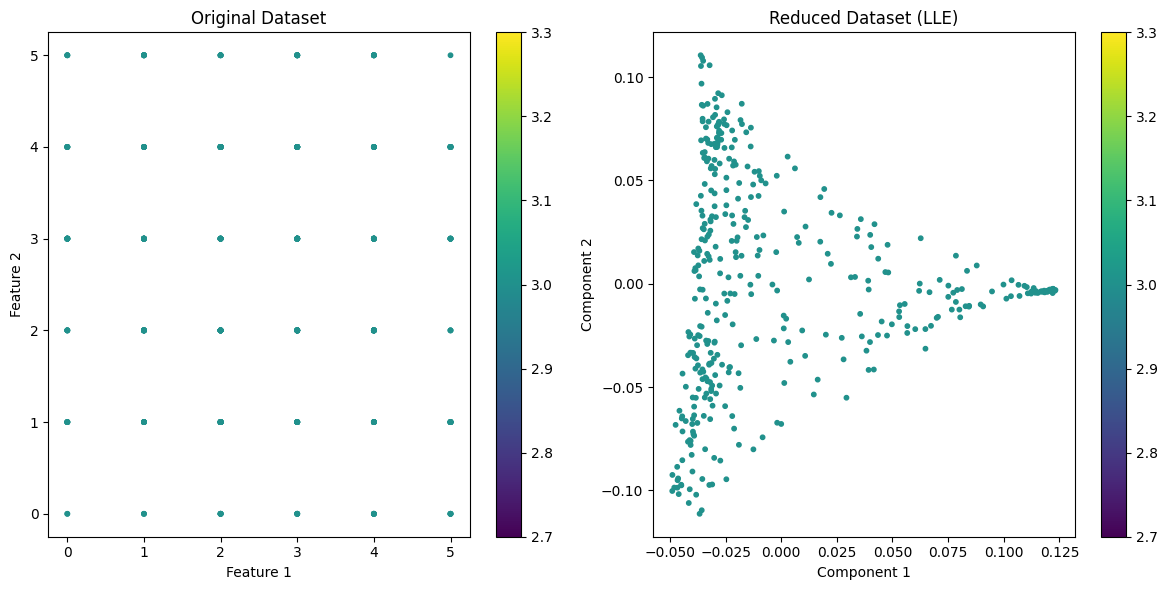

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

# Plot reduced dataset
plt.subplot(122)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=10)
plt.title('Reduced Dataset (LLE)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

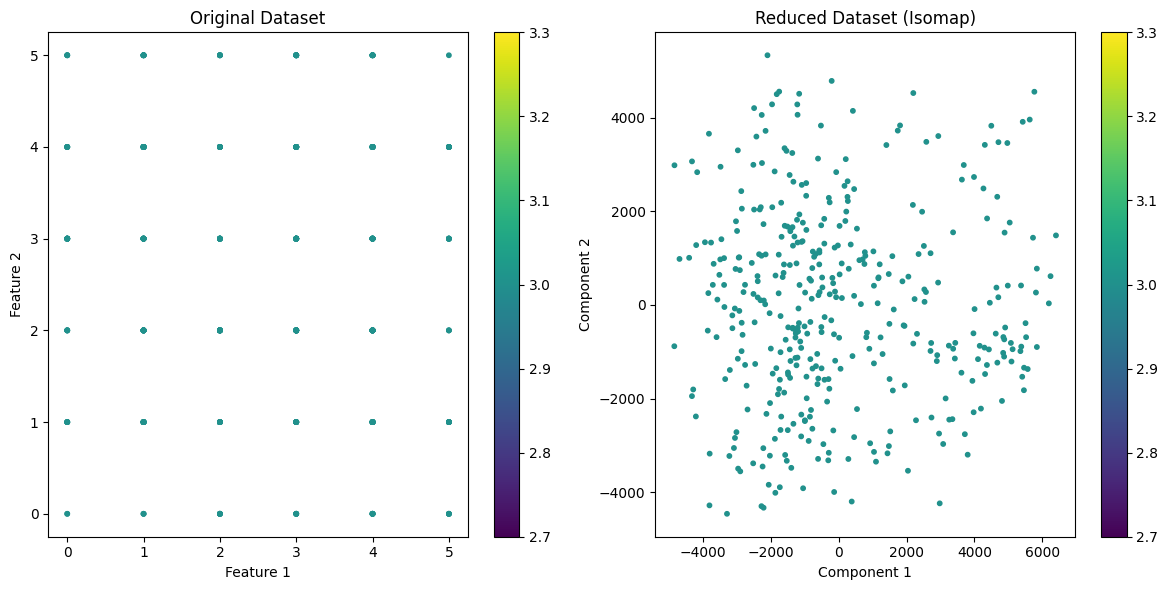

In [ ]:
## Section 1 -> Q2

X = FilteredData.iloc[:, :-1].values
y = FilteredData.iloc[:, -1].values

isomap = Isomap(n_neighbors=5, n_components=2)

X_isomap = isomap.fit_transform(X)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

# Plot reduced dataset
plt.subplot(122)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='viridis', s=10)
plt.title('Reduced Dataset (Isomap)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
## Section 1 -> Q3

data = pd.read_csv("DataC.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define number of iterations
num_iterations = 10
accuracies_lle = []
accuracies_isomap = []
accuracies_pca = []
accuracies_lda = []

# Loop for multiple iterations
for i in range(num_iterations):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Dimensionality reduction with LLE
    lle = LocallyLinearEmbedding(n_components=4, n_neighbors=5)
    X_train_lle = lle.fit_transform(X_train)
    X_test_lle = lle.transform(X_test)

    # Dimensionality reduction with ISOMAP
    isomap = Isomap(n_components=4, n_neighbors=5)
    X_train_isomap = isomap.fit_transform(X_train)
    X_test_isomap = isomap.transform(X_test)

    # Dimensionality reduction with PCA
    pca = PCA(n_components=4)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Dimensionality reduction with LDA
    lda = LDA(n_components=4)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    # Train Naive Bayes classifier on LLE reduced dataset
    nb_lle = GaussianNB()
    nb_lle.fit(X_train_lle, y_train)
    y_pred_lle = nb_lle.predict(X_test_lle)
    accuracy_lle = accuracy_score(y_test, y_pred_lle)
    accuracies_lle.append(accuracy_lle)

    # Train Naive Bayes classifier on ISOMAP reduced dataset
    nb_isomap = GaussianNB()
    nb_isomap.fit(X_train_isomap, y_train)
    y_pred_isomap = nb_isomap.predict(X_test_isomap)
    accuracy_isomap = accuracy_score(y_test, y_pred_isomap)
    accuracies_isomap.append(accuracy_isomap)

    # Train Naive Bayes classifier on PCA reduced dataset
    nb_pca = GaussianNB()
    nb_pca.fit(X_train_pca, y_train)
    y_pred_pca = nb_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    accuracies_pca.append(accuracy_pca)

    # Train Naive Bayes classifier on LDA reduced dataset
    nb_lda = GaussianNB()
    nb_lda.fit(X_train_lda, y_train)
    y_pred_lda = nb_lda.predict(X_test_lda)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)
    accuracies_lda.append(accuracy_lda)

# Compute the average accuracy for each technique
avg_accuracy_lle = np.mean(accuracies_lle)
avg_accuracy_isomap = np.mean(accuracies_isomap)
avg_accuracy_pca = np.mean(accuracies_pca)
avg_accuracy_lda = np.mean(accuracies_lda)

print("Average accuracy of Naive Bayes with LLE:", avg_accuracy_lle)
print("Average accuracy of Naive Bayes with ISOMAP:", avg_accuracy_isomap)
print("Average accuracy of Naive Bayes with PCA:", avg_accuracy_pca)
print("Average accuracy of Naive Bayes with LDA:", avg_accuracy_lda)


Average accuracy of Naive Bayes with LLE: 0.982258064516129
Average accuracy of Naive Bayes with ISOMAP: 0.953225806451613
Average accuracy of Naive Bayes with PCA: 0.9274193548387096
Average accuracy of Naive Bayes with LDA: 0.9467741935483872


In [ ]:
## Section 2 -> Q1

DataA = pd.read_csv('DataA1.csv')

DataA.head()

X = DataA.iloc[:, :-1].values
y = DataA.iloc[:, -1].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1540, 57)
Testing set shape: (660, 57)


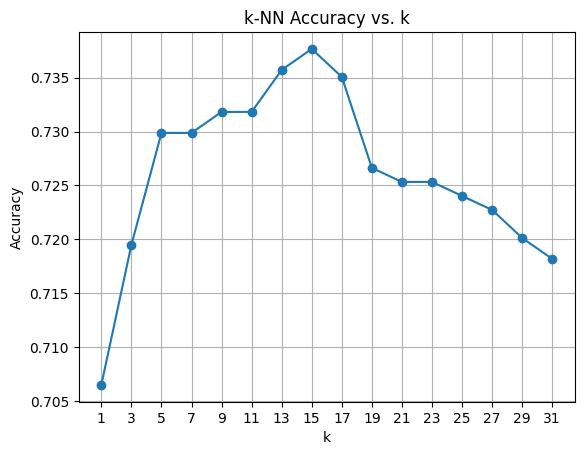

Best k in terms of classification accuracy: 15
Classification accuracy with best k: 0.7376623376623377


In [ ]:
## Section 2 -> Q2

k_values = np.arange(1, 32, 2)  # [1, 3, 5, ..., 31]

# Initialize lists to store mean accuracies for each value of k
mean_accuracies = []

# Perform 5-fold cross-validation for each value of k
for k in k_values:
    # Create k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    # Calculate mean accuracy across folds
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)

# Plot the relationship between k and accuracy
plt.figure()
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('k-NN Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best k in terms of classification accuracy
best_k_index = np.argmax(mean_accuracies)
best_k = k_values[best_k_index]
best_accuracy = mean_accuracies[best_k_index]
print("Best k in terms of classification accuracy:", best_k)
print("Classification accuracy with best k:", best_accuracy)

In [ ]:
## Section 2 -> Q3

param_grid = {'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50],
              'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}

# Create an SVM classifier with the RBF kernel
svm = SVC(kernel='rbf')

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_score)

Best parameters: {'C': 10, 'gamma': 0.01}
Best accuracy: 0.9045454545454547


In [ ]:
## Section 2 -> Q4

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

# Define a function to evaluate a classifier
def evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Define the classifiers with selected parameters
knn = KNeighborsClassifier(n_neighbors=best_k)
svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
nb = GaussianNB()
dt = DecisionTreeClassifier()

# Define variables to store evaluation results
accuracy_results = {'KNN': [], 'SVM': [], 'Naive Bayes': [], 'Decision Tree': []}
precision_results = {'KNN': [], 'SVM': [], 'Naive Bayes': [], 'Decision Tree': []}
recall_results = {'KNN': [], 'SVM': [], 'Naive Bayes': [], 'Decision Tree': []}
f1_results = {'KNN': [], 'SVM': [], 'Naive Bayes': [], 'Decision Tree': []}

# Repeat the process 20 times
for _ in range(20):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # You can set a seed for reproducibility

    # Evaluate each classifier
    accuracy, precision, recall, f1 = evaluate_classifier(knn, X_train, X_test, y_train, y_test)
    accuracy_results['KNN'].append(accuracy)
    precision_results['KNN'].append(precision)
    recall_results['KNN'].append(recall)
    f1_results['KNN'].append(f1)

    accuracy, precision, recall, f1 = evaluate_classifier(svm, X_train, X_test, y_train, y_test)
    accuracy_results['SVM'].append(accuracy)
    precision_results['SVM'].append(precision)
    recall_results['SVM'].append(recall)
    f1_results['SVM'].append(f1)

    accuracy, precision, recall, f1 = evaluate_classifier(nb, X_train, X_test, y_train, y_test)
    accuracy_results['Naive Bayes'].append(accuracy)
    precision_results['Naive Bayes'].append(precision)
    recall_results['Naive Bayes'].append(recall)
    f1_results['Naive Bayes'].append(f1)

    accuracy, precision, recall, f1 = evaluate_classifier(dt, X_train, X_test, y_train, y_test)
    accuracy_results['Decision Tree'].append(accuracy)
    precision_results['Decision Tree'].append(precision)
    recall_results['Decision Tree'].append(recall)
    f1_results['Decision Tree'].append(f1)

# Calculate average and standard deviation of performance metrics
def print_results(results):
    for classifier, metric in results.items():
        avg_metric = np.mean(metric)
        std_metric = np.std(metric)
        print(f"{classifier}:")
        print(f"  Average : {avg_metric:.4f}, Standard Deviation: {std_metric:.4f}")
        print()

print("Accuracy Results:")
print_results(accuracy_results)

print("Precision Results:")
print_results(precision_results)

print("Recall Results:")
print_results(recall_results)

print("F1-score Results:")
print_results(f1_results)


Accuracy Results:
KNN:
  Average : 0.7477, Standard Deviation: 0.0000

SVM:
  Average : 0.8932, Standard Deviation: 0.0000

Naive Bayes:
  Average : 0.8591, Standard Deviation: 0.0000

Decision Tree:
  Average : 0.9305, Standard Deviation: 0.0073

Precision Results:
KNN:
  Average : 0.7955, Standard Deviation: 0.0000

SVM:
  Average : 0.8934, Standard Deviation: 0.0000

Naive Bayes:
  Average : 0.8596, Standard Deviation: 0.0000

Decision Tree:
  Average : 0.9306, Standard Deviation: 0.0073

Recall Results:
KNN:
  Average : 0.7477, Standard Deviation: 0.0000

SVM:
  Average : 0.8932, Standard Deviation: 0.0000

Naive Bayes:
  Average : 0.8591, Standard Deviation: 0.0000

Decision Tree:
  Average : 0.9305, Standard Deviation: 0.0073

F1-score Results:
KNN:
  Average : 0.7364, Standard Deviation: 0.0000

SVM:
  Average : 0.8932, Standard Deviation: 0.0000

Naive Bayes:
  Average : 0.8591, Standard Deviation: 0.0000

Decision Tree:
  Average : 0.9305, Standard Deviation: 0.0073



In [ ]:
## Section 3-> Q1

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Load iris dataset as an example
DataB = pd.read_csv('DataB1.csv')

DataB.head()

X = DataB.iloc[:, :-1].values
y = DataB.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-Versus-All (OvA) Strategy
ova_clf = OneVsRestClassifier(SVC(kernel='linear'))
ova_clf.fit(X_train, y_train)
ova_pred = ova_clf.predict(X_test)
ova_accuracy = accuracy_score(y_test, ova_pred)
print("Accuracy using One-Versus-All (OvA) Strategy:", ova_accuracy)

# One-Versus-One (OvO) Strategy
ovo_clf = OneVsOneClassifier(SVC(kernel='linear'))
ovo_clf.fit(X_train, y_train)
ovo_pred = ovo_clf.predict(X_test)
ovo_accuracy = accuracy_score(y_test, ovo_pred)
print("Accuracy using One-Versus-One (OvO) Strategy:", ovo_accuracy)

Accuracy using One-Versus-All (OvA) Strategy: 0.9555555555555556
Accuracy using One-Versus-One (OvO) Strategy: 1.0


In [ ]:
## Section 3-> Q2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv("DataB1.csv")

# Split features and target variable
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

# Create SVM classifier with scaling
svm_scaled = SVC(kernel='linear')

# Create SVM classifier without scaling
svm_not_scaled = SVC(kernel='linear')

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier with scaling
svm_scaled.fit(X_train_scaled, y_train)

# Train SVM classifier without scaling
svm_not_scaled.fit(X_train, y_train)

# Make predictions
y_pred_scaled = svm_scaled.predict(X_test_scaled)
y_pred_not_scaled = svm_not_scaled.predict(X_test)

# Evaluate performance of scaled SVM
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

precision_scaled = precision_score(y_test,
                                   y_pred_scaled,
                                   average='macro')

recall_scaled = recall_score(y_test,
                             y_pred_scaled,
                             average='macro')

f1_score_scaled = f1_score(y_test,
                           y_pred_scaled,
                           average='macro')

conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)

# Evaluate performance of not scaled SVM
accuracy_not_scaled = accuracy_score(y_test, y_pred_not_scaled)

precision_not_scaled = precision_score(y_test,
                                       y_pred_not_scaled,
                                       average='macro')

recall_not_scaled = recall_score(y_test,
                                 y_pred_not_scaled,
                                 average='macro')

f1_score_not_scaled = f1_score(y_test,
                               y_pred_not_scaled,
                               average='macro')

conf_matrix_not_scaled = confusion_matrix(y_test, y_pred_not_scaled)

# Print results
print("Results for SVM with scaled features:")
print("Accuracy:", accuracy_scaled)
print("Precision:", precision_scaled)
print("Recall:", recall_scaled)
print("F1 Score:", f1_score_scaled)
print("Confusion Matrix:\n", conf_matrix_scaled)

print("\nResults for SVM without scaled features:")
print("Accuracy:", accuracy_not_scaled)
print("Precision:", precision_not_scaled)
print("Recall:", recall_not_scaled)
print("F1 Score:", f1_score_not_scaled)
print("Confusion Matrix:\n", conf_matrix_not_scaled)

Results for SVM with scaled features:
Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9743589743589745
F1 Score: 0.974320987654321
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Results for SVM without scaled features:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
## Section 3-> Q3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Load dataset B
data_b = pd.read_csv("DataB1.csv")

# Separate features (X) and labels (y)
X = data_b.drop(columns=['class'])  # Assuming 'Species' is the target column
y = data_b['class']

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict on the test set
predictions = dt_classifier.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, predictions)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)

# Print the classification metrics
print("Decision Tree Classification Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("\nConfusion Matrix:")
print(conf_matrix)


Decision Tree Classification Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
